
# Caso de uso: Exploración y comparación de fábulas
**Autor:** Unidad de Científicos de Datos (UCD)

---
Este ejemplo muestra cómo utilizar la librería **ConTexto** para analizar textos, mediante la aplicación de técnicas de lectura, limpieza, exploración, vectorización y comparación. A continuación se muestran los pasos para importar los módulos necesarios de la librería y utilizarlos para trabajar con tres textos diferentes.

Los textos de ejemplo son tres fábulas cortas cuyos textos fueron descargados desde <a href="https://aprenderespanol.org/lecturas/cuentos-breves-fabulas.html" target="_blank">aprenderespanol.org</a>, y fueron guardados en archivos de diferentes tipos.
    
El objetivo final de este ejercicio es comparar el texto de las fábulas para saber qué tanto se parecen entre sí.



---
## 1. Importar los paquetes y librerias necesarios
El primer paso es importar las funciones de los módulos de interés de **ConTexto**. En este caso se importan funciones de los módulos de lectura, escritura, limpieza, exploración, vectorización, y comparación.

La documentación para verificar qué hace cada módulo y función de ConTexto se encuentra en el siguiente enlace: https://ucd-dnp.github.io/ConTexto/   

In [1]:
from contexto.lectura import leer_texto
from contexto.limpieza import limpieza_texto, remover_acentos, lista_stopwords
from contexto.escritura import escribir_texto
from contexto.vectorizacion import VectorizadorFrecuencias
from contexto.comparacion import Similitud
from contexto.exploracion import nube_palabras

---
## 2. Leer textos de interés

Se van a comparar las tres siguientes fábulas con métodos de analítica de texto: 

- El cabrito y el lobo. El texto está en un archivo Word con extensión .docx
- La cabra y el asno. El texto está en un archivo PDT digitalizado con extensión .pdf
- El zorro y el cuervo. El texto se encuentra en un archivo plano con extensión .txt

La extracción de los textos de cada archivo tiene una metodología distina. **ConTexto** facilita el código de importación de textos con la función `leer_texto`.

### 2.1 Definir las rutas de los archivos con los textos
En este paso se definen las rutas de los archivos que se van a importar. Estos se encuentran en la carpeta 'entrada'

In [2]:
ruta_fabula_1 = "entrada/fábula_cabrito_y_lobo.docx"
ruta_fabula_2 = "entrada/fábula_cabra_y_asno.pdf"
ruta_fabula_3 = "entrada/fábula_zorro_y_cuervo.txt"

### 2.2 Leer los textos

Si no se especifica el tipo de archivo en la función `leer_texto`, esta observará la extensión del archivo a leer y actuará acorde a esta información.

A continuación se extrae el texto de los tres archivos, y se imprimen sus primeros 50 caracteres.

In [3]:
texto_1 = leer_texto(ruta_fabula_1)
texto_2 = leer_texto(ruta_fabula_2)
texto_3 = leer_texto(ruta_fabula_3)

print('----- Primeros 50 caracteres de cada texto:')
print(f'* Fábula 1: {texto_1[:50]}')
print(f'* Fábula 2: {texto_2[:50]}')
print(f'* Fábula 3: {texto_3[:50]}')


----- Primeros 50 caracteres de cada texto:
* Fábula 1: El cabrito y el lobo

Al salir la cabra de su esta
* Fábula 2: La cabra y el asno 

Un campesino alimentaba al mi
* Fábula 3: El Zorro y El Cuervo

Cierto cuervo, de los feos e


---
## 3. Preprocesamiento de textos

El preprocesamiento de los textos es un paso importante para reducir ruido y del texto original que puedan entorpecer los análisis a realizar, y en general adecuar los textos de entrada para poder aprovecharlos mejor.   

En este caso, se utilizaron las funciones `remover_acentos` para eliminar los acentos y `limpieza_texto` para el resto del preprocesamiento. Vale la pena mencionar que también es posible quitar los acentos desde la función `limpieza_texto` si se utiliza el parámetro `quitar_acentos=True`.

### 3.1 Crear una lista de Python con los tres textos
Se crea la lista `lista_fabulas` con los tres textos a analizar.

In [4]:
lista_fabulas = [texto_1, texto_2, texto_3]

### 3.2 Quitar acentos de los textos


In [5]:
lista_fabulas = [remover_acentos(q) for q in lista_fabulas]

### 3.3 Pasar textos minúsculas, quitar puntuación y stopwords
A continuación se pasa el texto a minúsculas, se quita la puntuación y se eliminan stopwords con la función 'limpieza_texto'. Los stopwords se cargan por medio de la función `lista_stopwords`, del módulo `limpieza` de **ConTexto"**.

In [6]:
# Lista de stopwords comunes en español
sw = lista_stopwords()

# Limpiar el texto con la función 'limpieza_texto'
lista_fabulas_limpios = [limpieza_texto(t, lista_palabras=sw) for t in lista_fabulas]

# Mostrar el texto limpio de la primera fábula
lista_fabulas_limpios[0]

'cabrito lobo salir cabra establo encargo hijo cuidado casa advirtiendole peligro animales rondaban alrededores intencion entrar establos devorar ganados tardo llegar enemigo lobo horrible amiguitos mios lobo imitando voz cabra llamo cortesmente puerta entrar mirar cabrito rendija vio feroz carnicero intimidarse dirigio siguiente discurso bien mayor adversario imitando voz madre pretendes entrar devorarme puedes marcharte odiado animal sere abra puerta sigue consejo padres viviras feliz toda vida fin'

### 3.4 Guardar textos en archivos .txt para ser utilizados luego

Luego de hacer el preprocesamiento se decide guardar los textos preprocesados en archivos '.txt' para ser utilizados luego. Si bien en este ejemplo los textos se extrajeron y limpiaron con mucha rapidez, en muchos casos este proceso puede tomar varias horas por cuenta de la longitud del texto y el tipo de preprocesamiento (puede incluirse corrección ortográfica o lematización, por ejemplo). La extracción de textos con OCR de archivos escaneados con una extensión muy larga puede ser extremadamente lenta, por lo cual guardar los resultados parciales puede ser una muy buena práctica.

Para guardar los textos en nuevos archivos, se utiliza la función `escribir_texto`, del módulo `escritura` de **ConTexto"**.

In [7]:
import os
from contexto.utils.auxiliares import verificar_crear_dir

# Crear directorio de salida
dir_salida = 'salida/fábulas_limpias/'
verificar_crear_dir(dir_salida)

for i, texto in enumerate(lista_fabulas_limpios):
    escribir_texto(os.sep.join([dir_salida, f'{i+1}.txt']), texto)


---
## 4. Visualización de textos

Como método de exploración se crea una nube de palabras para la fábula 'El cabrito y el lobo'. Esto se puede hacer por medio de la función `nube_palabras`, del módulo `exploracion` de **ConTexto"**.

En este caso, el preprocesamiento previo ayuda a quitar palabras como conectores y preposiciones, dejando en la nube términos que nos pueden aportar mejor conocimiento sobre el texto.

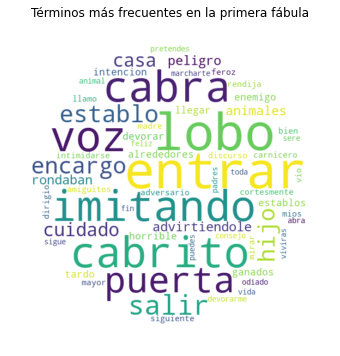

In [8]:
nube_palabras(lista_fabulas_limpios[0], n_grama=1, n_terminos=100, graficar=True, 
              dim_figura=(6, 6), hor = 0.9, titulo='Términos más frecuentes en la primera fábula')

---
## 5. Vectorización de textos 

La vectorización de textos consiste en convertir el texto preprocesado a una representación numérica para luego poder aplicar operaciones matemáticas. 

En este caso se vectorizarán los por medio de la metodología Bag Of Words (BOW) del módulo `vectorizacion` de **ConTexto**. Este módulo también cuenta con otras metodologías como TF-IDF, hashing, Word2Vec y Doc2Vec.

### 5.1 Inicializar y ajustar vectorizador BOW

In [9]:
v_bow = VectorizadorFrecuencias()
v_bow.ajustar(lista_fabulas_limpios)

### 5.2 Vectorizar los textos


In [10]:
bow_fabulas = v_bow.vectorizar(lista_fabulas_limpios)
bow_fabulas.shape

(3, 174)

---
## 6. Cálculo de similitud de textos

Una vez definidos los vectores de los tres textos, es posible aplicar metodologías de comparación de textos. En este caso se utilizará la simiitud coseno. Esta es una de las muchas metodologías de comparación de textos que se puede hacer con **ConTexto**.

### 6.1 Inicializar la clase 'Similitud' de ConTexto
Se inicia la clase Similitud con el vectorizador de bag of words definido en el paso 4

In [11]:
s_bow = Similitud(v_bow)

### 6.2 Calcular la matriz de similitudes coseno entre los tres textos


In [12]:
coseno_bow = s_bow.coseno(lista_fabulas_limpios)

# Convertir a dataframe de pandas
import pandas as pd
fabulas = ["el cabrito y el lobo", "la cabra y el asno", "el zorro y el cuervo"]
coseno_bow = pd.DataFrame(coseno_bow, index=fabulas, columns=fabulas)
coseno_bow

,el cabrito y el lobo,la cabra y el asno,el zorro y el cuervo
el cabrito y el lobo,1.000000,0.162288,0.070675
la cabra y el asno,0.162288,1.000000,0.036867
el zorro y el cuervo,0.070675,0.036867,1.000000
